<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/google_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
path = "/content/drive/MyDrive/google play store data/apps.csv"
df = pd.read_csv(path)

# Display the first few rows of the dataframe
print(df.head())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [4]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [20]:
# Correct data types, converting 'Rating' to a float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
print(df.dtypes) # Changed 'datatypes' to 'dtypes'

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [9]:
# apps_df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [13]:
# df['Current Ver'].fillna('Unknown', inplace=True)
# df['Android Ver'].fillna('Unknown', inplace=True)

In [14]:
# Dropping columns with many missing values.
# apps_df.drop(columns=['Size'], inplace=True)


In [10]:
# Removing duplicates
df.drop_duplicates(inplace=True)

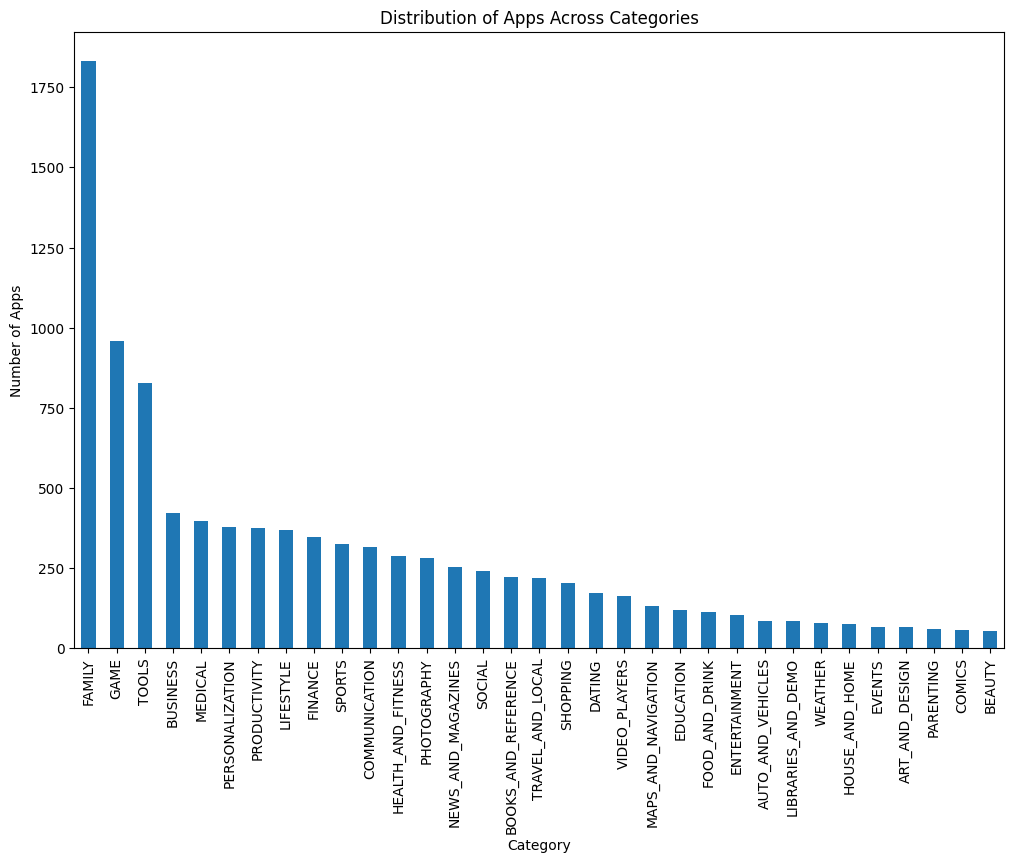

In [21]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Plot the distribution of apps across categories
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()


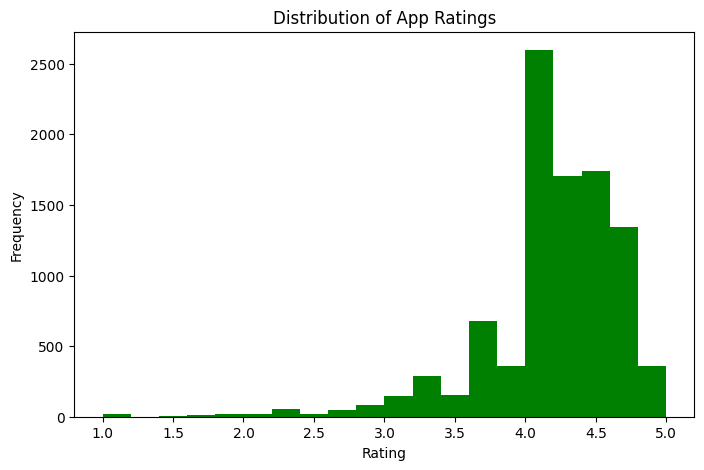

In [26]:
# Analyzing ratings
plt.figure(figsize=(8, 5))
df['Rating'].plot(kind='hist', bins=20, color='green')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


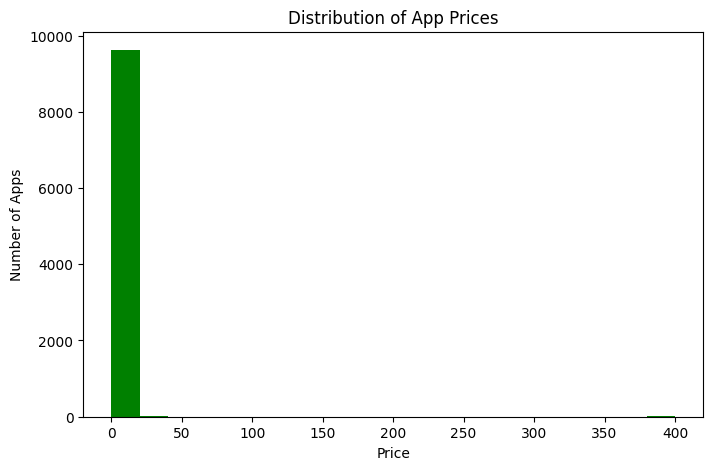

In [27]:

#  converting 'Price' to numeric (removing $ and converting to float)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Visualize price distribution
plt.figure(figsize=(8, 5))
df['Price'].plot(kind='hist', bins=20, color='green')
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.show()


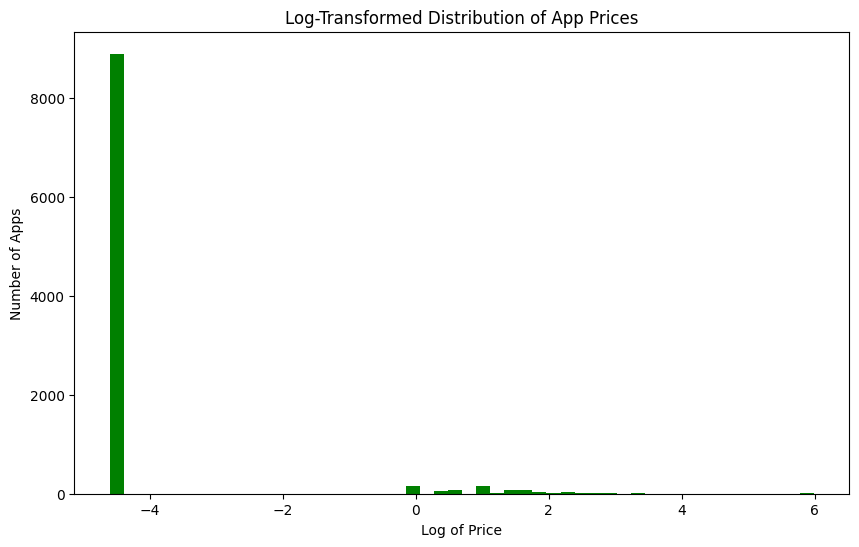

In [29]:

import numpy as np

# Check if 'Price' column is of type object (string) before applying str.replace
if df['Price'].dtype == object:
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Applying a logarithmic transformation to prices to reduce skewness
# Adding a small value to avoid taking log of zero
df['log_price'] = np.log(df['Price'] + 0.01)

# Plotting the log-transformed prices
plt.figure(figsize=(10, 6))
df['log_price'].plot(kind='hist', bins=50, color='green')
plt.title('Log-Transformed Distribution of App Prices')
plt.xlabel('Log of Price')
plt.ylabel('Number of Apps')
plt.show()

In [30]:
# Median
median_price = df['Price'].median()
print(f"Median Price: {median_price}")

# Mode
mode_price = df['Price'].mode()[0]
print(f"Mode Price: {mode_price}")

# Variance
variance_price = df['Price'].var()
print(f"Variance of Price: {variance_price}")

# Skewness
skewness_price = df['Price'].skew()
print(f"Skewness of Price: {skewness_price}")

# Kurtosis
kurtosis_price = df['Price'].kurt()
print(f"Kurtosis of Price: {kurtosis_price}")


Median Price: 0.0
Mode Price: 0.0
Variance of Price: 283.9950238926527
Skewness of Price: 22.53032537230726
Kurtosis of Price: 519.9229479562337


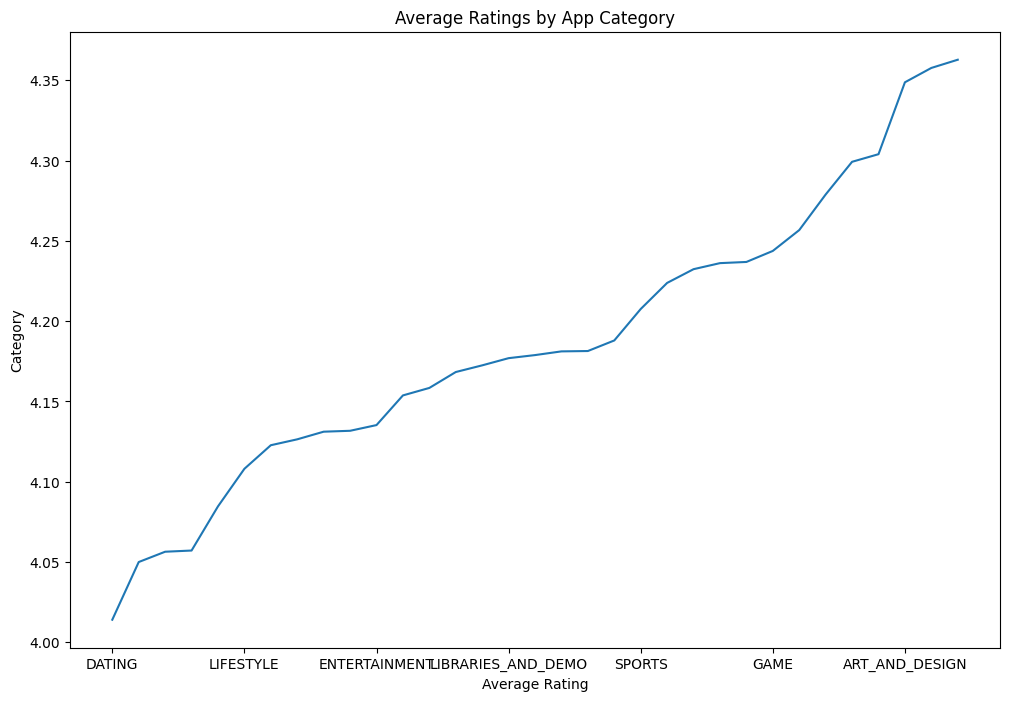

In [36]:
# Analyzing the relationship between category and ratings
category_ratings = df.groupby('Category')['Rating'].mean()

plt.figure(figsize=(12, 8))
category_ratings.sort_values().plot(kind='line')
plt.title('Average Ratings by App Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


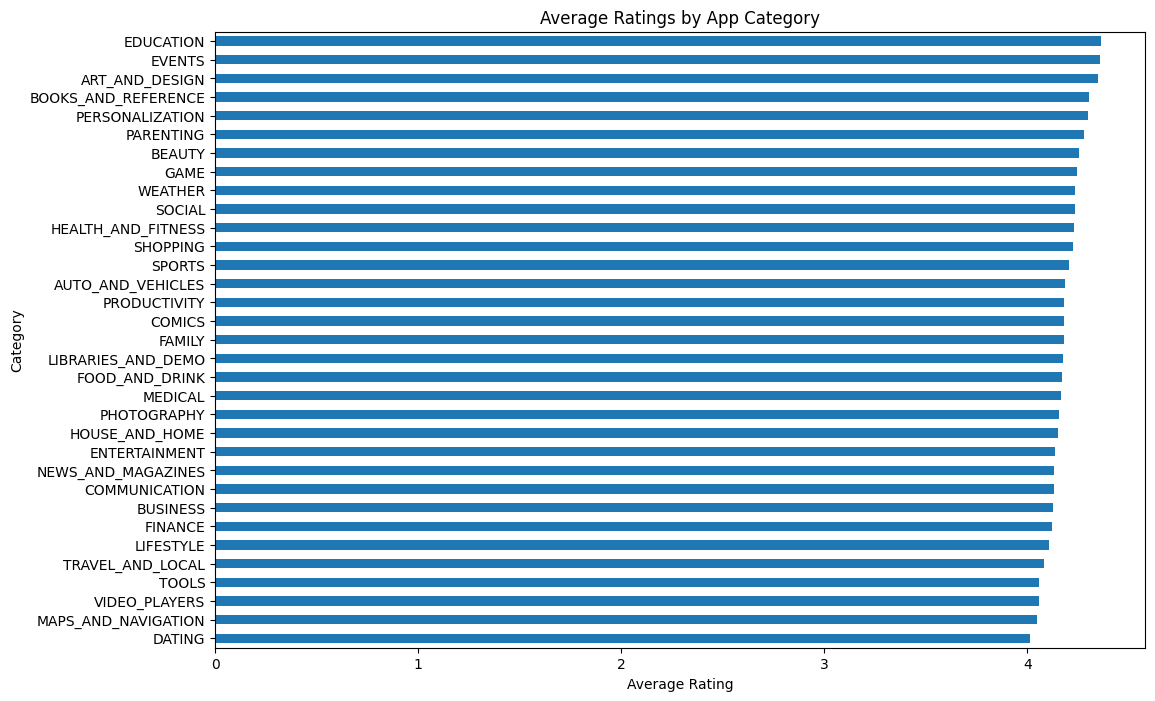

In [40]:
# Analyzing the relationship between category and ratings
category_ratings = df.groupby('Category')['Rating'].mean()

plt.figure(figsize=(12, 8))
category_ratings.sort_values().plot(kind='barh')
plt.title('Average Ratings by App Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

In [42]:

# Filter out apps with low ratings and low number of reviews
filtered_apps = df[(df['Rating'] > 3.5) & (df['Reviews'] > 1000)]
print(filtered_apps.head())


    Unnamed: 0                                                App  \
2            2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3            3                              Sketch - Draw & Paint   
7            7                                   Infinite Painter   
8            8                               Garden Coloring Book   
10          10                            Text on Photo - Fonteee   

          Category  Rating  Reviews  Size     Installs  Type  Price  \
2   ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free    0.0   
3   ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free    0.0   
7   ART_AND_DESIGN     4.1    36815  29.0   1,000,000+  Free    0.0   
8   ART_AND_DESIGN     4.4    13791  33.0   1,000,000+  Free    0.0   
10  ART_AND_DESIGN     4.4    13880  28.0   1,000,000+  Free    0.0   

   Content Rating        Genres        Last Updated         Current Ver  \
2        Everyone  Art & Design      August 1, 2018               1.2.4   
3       

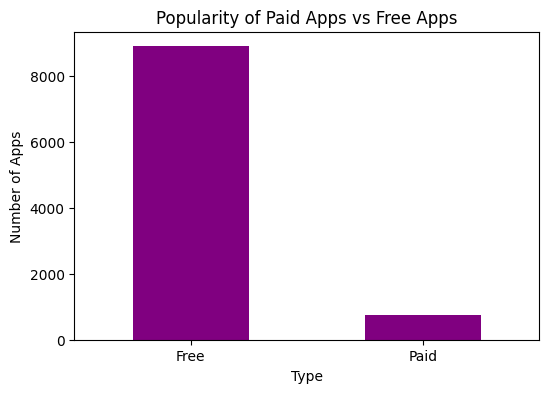

In [44]:
# Assuming 'Type' column indicates if an app is Free or Paid
popularity = df['Type'].value_counts()

plt.figure(figsize=(6, 4))
popularity.plot(kind='bar', color='purple')
plt.title('Popularity of Paid Apps vs Free Apps')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.xticks(rotation=0)
plt.show()


In [57]:


# Load the user reviews dataset
rev = pd.read_csv('/content/drive/MyDrive/google play store data/user_reviews.csv')

# Display the first few rows of the dataframe to understand its structure
print(rev.head())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [58]:
import re

# Function to clean the review text
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lower case
    text = text.lower()
    # Remove leading and trailing whitespaces
    text = text.strip()
    return text



In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score
def get_sentiment(text):
    # Check if the text is a string before processing
    if isinstance(text, str):
        score = sia.polarity_scores(text)
        return score['compound']  # Returns the compound score
    else:
        # Handle non-string values (e.g., NaN or float)
        return 0  # Or any other appropriate value

# Ensure 'Translated_Review' is the correct column name
# Apply the sentiment analysis function to the 'Translated_Review' column if it exists
if 'Translated_Review' in rev.columns:  # Check if column exists before applying
    rev['Sentiment_Score'] = df['Translated_Review'].apply(get_sentiment)
else:
    print("Column 'Translated_Review' not found in the DataFrame. Please check the column name.")

# Display the first few rows to see the sentiment scores
print(rev.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Sentiment_Score  
0  Positive                1.00                0.533333           0.9531  
1  Positive                0.25                0.288462           0.6597  
2       NaN                 NaN                     NaN           0.0000  
3  Positive                0.40                0.875000           0.6249  
4  Positive                1.00                0.300000           0.6369  


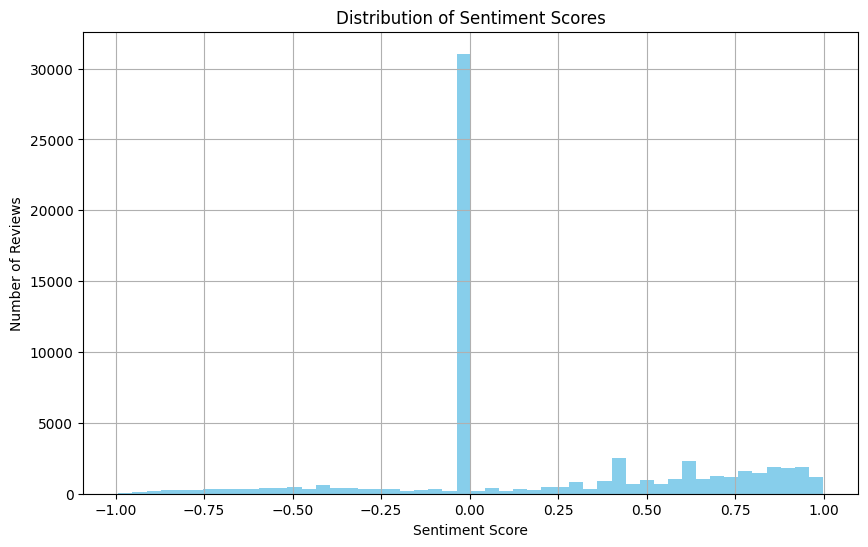

In [61]:
import matplotlib.pyplot as plt

# Visualizing the distribution of sentiment scores
plt.figure(figsize=(10, 6))
rev['Sentiment_Score'].hist(bins=50, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()
